In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as slv
import sympy as sym
import scipy.optimize as opt
from IPython.display import display, Latex

from sympy import Interval, Symbol, stationary_points

## Часть 1. Триггер Жакоба-Моно
Уравнение:

$$
\left\{\begin{array}{l}
\frac{d x}{d t}=-x+\frac{L_1}{1+y^{2}} \\
\frac{d y}{d t}=-y+\frac{L_2}{1+x^{2}}
\end{array}\right.
$$

In [2]:
P = lambda x, y, L: - x + L /(1 + y**2)
Q = lambda x, y, L: - y + L / (1 + x**2)


fun0 = lambda p, t, *args: [ P(p[0], p[1], L), Q(p[0], p[1], L)]


### П.3  Cобственные числа, Sympy

In [6]:
# уравнение sympy, обозначение параметра - L1

x0, y0, L1, t = sym.symbols('x0, y0, L1, t')
x = sym.Function('x')(t)
y = sym.Function('y')(t)

x_rate = - x + L1 /(1 + y**2)
y_rate = - y + L1 / (1 + x**2)

eq1 = sym.Eq(x.diff(t), x_rate)
eq2 = sym.Eq(y.diff(t), y_rate)

L = 0.5

eq1_sub = eq1.rhs.subs(L1, L)
eq2_sub = eq2.rhs.subs(L1, L)

eq1 


Eq(Derivative(x(t), t), L1/(y(t)**2 + 1) - x(t))

#### Матрица Якоби

In [7]:
J = sym.Matrix([x_rate, y_rate]).jacobian(sym.Matrix([x,y]))

In [8]:
J

Matrix([
[                         -1, -2*L1*y(t)/(y(t)**2 + 1)**2],
[-2*L1*x(t)/(x(t)**2 + 1)**2,                          -1]])

#### Собственные векторы

In [9]:
J_vects = J.eigenvects()


In [10]:
# собств. вектор 1
eigvec1 = J_vects[0][2][0]
eigvec1

Matrix([
[-(-x(t)**4*y(t) - 2*x(t)**2*y(t) - y(t))/sqrt(x(t)**5*y(t)**5 + 2*x(t)**5*y(t)**3 + x(t)**5*y(t) + 2*x(t)**3*y(t)**5 + 4*x(t)**3*y(t)**3 + 2*x(t)**3*y(t) + x(t)*y(t)**5 + 2*x(t)*y(t)**3 + x(t)*y(t))],
[                                                                                                                                                                                                     1]])

In [11]:
# собств. вектор 2
eigvec2 = J_vects[1][2][0]
eigvec2

Matrix([
[-(x(t)**4*y(t) + 2*x(t)**2*y(t) + y(t))/sqrt(x(t)**5*y(t)**5 + 2*x(t)**5*y(t)**3 + x(t)**5*y(t) + 2*x(t)**3*y(t)**5 + 4*x(t)**3*y(t)**3 + 2*x(t)**3*y(t) + x(t)*y(t)**5 + 2*x(t)*y(t)**3 + x(t)*y(t))],
[                                                                                                                                                                                                    1]])

In [12]:
# собственные векторы

x05, y05= 0.4238538, 0.4238538
x3, y3 = [1.51598023, 1.51598023]

eigvec1_L05 = eigvec1.subs(x, x05).subs(y, y05)
eigvec1_L3  = eigvec1.subs(x, x3).subs(y, y3)

eigvec2_L05 = eigvec2.subs(x, x05).subs(y, y05)
eigvec2_L3  = eigvec2.subs(x, x3).subs(y, y3)

#### Собственные числа и типы стационара

In [13]:
f_eigen1 = sym.lambdify([x, y, L1], sym.re(J_vects[0][0]))
f_eigen2 = sym.lambdify([x, y, L1], sym.re(J_vects[1][0]))

In [14]:
fun1 = lambda x, L: - x + L /(1 + x**2)

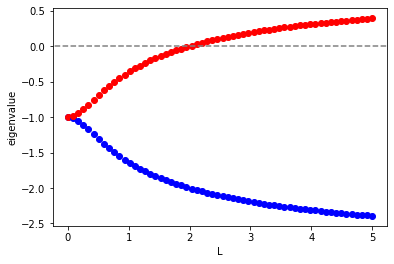

In [116]:
Ls = np.linspace(0, 5, 60)
for L_ in Ls:
    
    res = opt.fsolve(fun1, x0 = [0, 4],  args = (L_, ))

    xr = res[0]
    yr = res[1]

    
    plt.scatter(L_, f_eigen1(xr, yr, L_), color='blue')
    plt.scatter(L_, f_eigen2(xr, yr, L_), color='red')
    
plt.xlabel("L")
plt.ylabel("eigenvalue")
plt.axhline(0, -4, 4, color="grey", linestyle="--")
plt.show()

Вывод:  
При L < 2 симметричный стационар - устойчивый узел  
При L > 2 симметричный стационар - седло

### П.1

#### Устойчивый узел, один

In [53]:
eigvec1_L05
eigvec2_L05

Matrix([
[-1.0],
[   1]])

0.42385379906979087


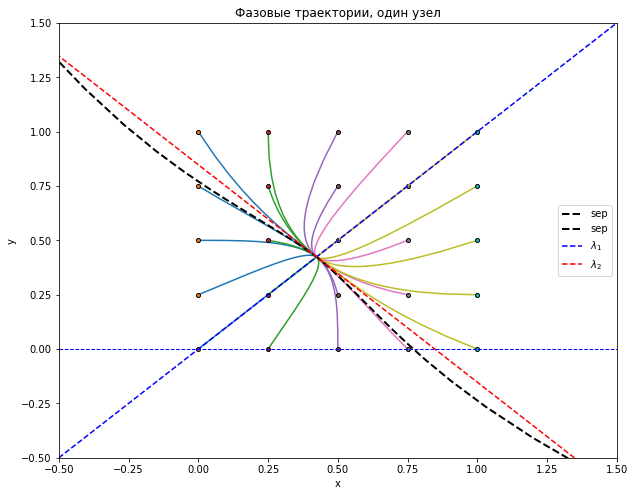

In [80]:
#параметр
L = 0.5

# корень при L = 0.5
fun1 = lambda x, L: - x + L / (1 + x**2)
res = opt.fsolve(fun1, x0 = [0, 4],  args = (L, ))


root = res[0]
print(root)

# фазовые траектории

# задать время
tt = np.linspace(0, 50, 200)

x0s = np.linspace(0, 1, 5)
y0s  = np.linspace(0, 1, 5)

plt.figure(figsize = (10,8))
for y0 in y0s:
    for x0 in x0s:
        xy0 = [x0, y0]

        zz = slv.odeint(fun0, xy0, tt, args = (L, ))
        plt.plot(zz[:,0], zz[:,1])
        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

mult0 = 1
mult = 4
# сепаратриса
xy0s = [[root+eigvec2_L05[0]*mult0, root+eigvec2_L05[1]*mult0], [root-eigvec2_L05[0]*mult0, root-eigvec2_L05[1]*mult0]]
for xy0 in xy0s:

        zz = slv.odeint(fun0, xy0, tt, args = (L, ))
        plt.plot(zz[:,0], zz[:,1], lw = 2, color='k', linestyle='--', label  = 'sep')
        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

# собственные векторы

plt.plot([root-eigvec1_L05[0]*mult, root+eigvec1_L05[0]*mult], 
        [root-eigvec1_L05[1]*mult, root+eigvec1_L05[1]*mult], 
        '--b', label='$\lambda_1$')

plt.plot([root-eigvec2_L05[0]*mult, root+eigvec2_L05[0]*mult], 
        [root-eigvec2_L05[1]*mult, root+eigvec2_L05[1]*mult], 
        '--r', label='$\lambda_2$')

plt.title('Фазовые траектории, один узел')
plt.axhline(0, color='b', linestyle='--', lw = 1)
#plt.axvline(0, color='b', linestyle='--', lw = 1)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()


### П.2

#### Два устойчивых узла и седло

In [55]:
#параметр
L =  3 

# корень при L = 3
fun1 = lambda x, L: - x + L / (1 + x**2)
res = opt.fsolve(fun1, x0 = [0, 4],  args = (L, ))


root = res[0]
root

1.2134116627621605

In [25]:
f_eigen2(root, root, L)

0.19105889149194044

In [26]:
# собственные веторы:

eigvec1_L3 
eigvec2_L3

Matrix([
[-1.0],
[   1]])

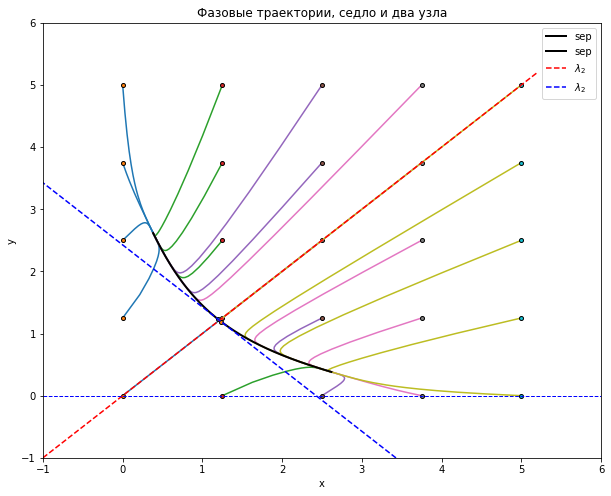

In [57]:
# фазовые траектории

# задать время
tt = np.linspace(0, 50, 200)

x0s = np.linspace(0, 5, 5)
y0s  = np.linspace(0, 5, 5)

plt.figure(figsize = (10,8))
for y0 in y0s:
    for x0 in x0s:
        xy0 = [x0, y0]

        zz = slv.odeint(fun0, xy0, tt, args = (L, ))
        plt.plot(zz[:,0], zz[:,1])
        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

mult = 0.02
mult2 = 4

# сепаратриса
xy0s = [[root+eigvec2_L3[0]*mult, root+eigvec2_L3[1]*mult], [root-eigvec2_L3[0]*mult, root-eigvec2_L3[1]*mult]]
for xy0 in xy0s:

        zz = slv.odeint(fun0, xy0, tt, args = (L, ))
        plt.plot(zz[:,0], zz[:,1], lw = 2, color='k', label  = 'sep')
        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

# собственные векторы

plt.plot([root-eigvec1_L3[0]*mult2, root+eigvec1_L3[0]*mult2], 
        [root-eigvec1_L3[1]*mult2, root+eigvec1_L3[1]*mult2], 
        '--r', label='$\lambda_2$')

plt.plot([root-eigvec2_L3[0]*mult2, root+eigvec2_L3[0]*mult2], 
        [root-eigvec2_L3[1]*mult2, root+eigvec2_L3[1]*mult2], 
        '--b', label='$\lambda_2$')



plt.title('Фазовые траектории, седло и два узла')
plt.axhline(0, color='b', linestyle='--', lw = 1)
#plt.axvline(0, color='b', linestyle='--', lw = 1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

# Часть 2.

Уравнение "хищник жертва" + ограничение численности
$$
\left\{\begin{array}{l}
\frac{d x}{d t}=e_{x} x-d_{x} x y \\
\frac{d y}{d t}=d_{y} x y-e_{y} y
\end{array}\right.
$$  

x - число зайцев  
y - число волков   
e_x - коэффициент размножения зайцев  
e_y - коэффициент смертности волков  
d_y - вероятность встречи зайца с волком  
d_y - вероятность встречи волка с зайцем  

In [124]:
# уравнение sympy

x0, y0, e_x, d_x, d_y, e_y, t = sym.symbols('x0, y0, e_x, d_x, d_y, e_y, t')
x = sym.Function('x')(t)
y = sym.Function('y')(t)

x_rate = e_x * x - d_x * x * y
y_rate = d_y * x * y - e_y * y

eq1 = sym.Eq(x.diff(t), x_rate)
eq2 = sym.Eq(y.diff(t), y_rate)



# eq1 = eq1.rhs.subs()
# eq2 = eq2.rhs.subs()

eq1 


Eq(Derivative(x(t), t), a_x*x(t) - d_x*x(t)*y(t))

### Исходная версия:


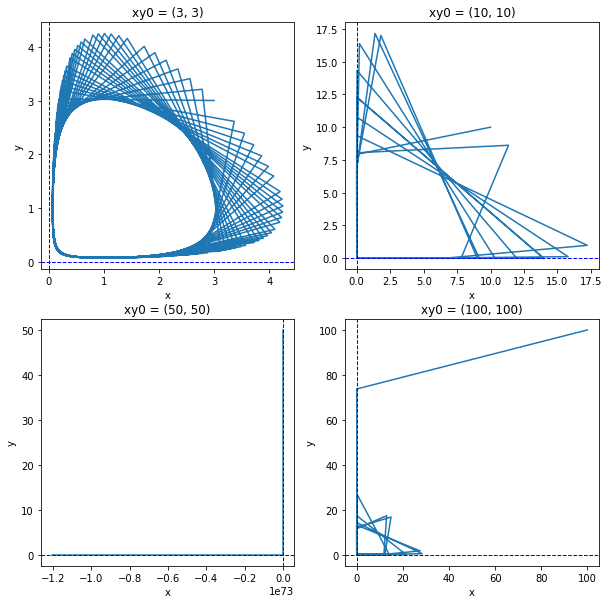

In [37]:
# функция

P = lambda x, y, e_x, d_x: e_x * x  - d_x * x * y
Q = lambda x, y, e_y, d_y,: d_y * x * y - e_y * y 


fun = lambda p, t, e_x, e_y, d_x, d_y, : [ P(p[0], p[1], e_x, d_x), Q(p[0], p[1], e_y, d_y)]

# фазовый портрет

# задать время
tt = np.linspace(0, 50, 200)

xy0 = [3, 3]

# параметры
# e_x_, e_y_, d_x_, d_y_

# args = (8, 8, 2, 2)
args = (4, 4, 4, 4)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

xy0s = [(3, 3), (10, 10), (50, 50), (100, 100)]

for ax, xy0 in list(zip(axes.flat, xy0s)):
    
    zz = slv.odeint(fun, xy0, tt, args)
    ax.plot(zz[:,0], zz[:,1])   
    ax.set_title(f'xy0 = {xy0}')
    ax.axhline(0, color='b', linestyle='--', lw = 1)
    ax.axvline(0, color='b', linestyle='--', lw = 1)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    
    





### Вариант 2:
Коэффициент частоты встречи зацев с волком - зависит от рождаемости зайцев   
Коэффициент встречи волка с зайцем - зависит от рождаемости волков  


Добавлена регуляция коэффициентов рождаемости и  смертности от числа соотв. зайцев и волков  
Перестало уходить в бесконечность

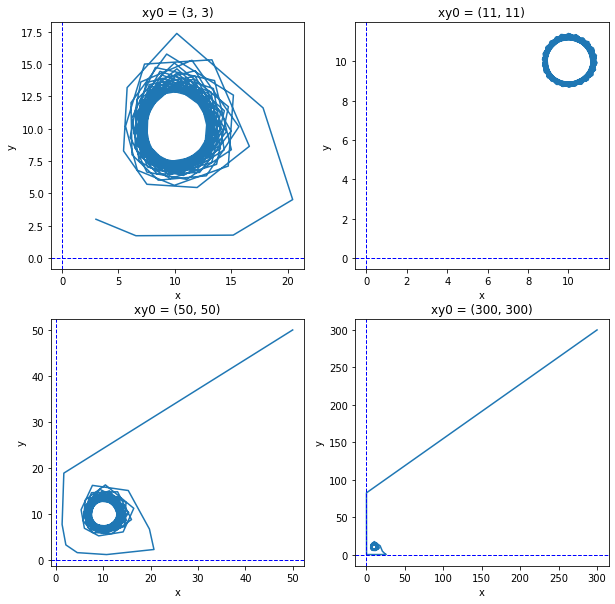

In [68]:
# функция

P = lambda x, y, e_x, d_x, K,L:  x *(e_x*(- 1 / (1 + np.exp(-x+L))+1) - e_x*0.1 * y)

Q = lambda x, y, e_y, d_y, L: - y*(e_y*( 1 / (1 + np.exp(-y+L))+1) - e_y*0.1 * x)


fun = lambda p, t, e_x_, e_y_, d_x_, d_y_, K, L: [ P(p[0], p[1], e_x_, d_x_, K, L), Q(p[0], p[1], e_y_, d_y_, L)]

# фазовый портрет
# задать время
tt = np.linspace(0, 50, 200)

# параметры
# e_x_, e_y_, d_x_, d_y_, , K, L

args = (4, 4, 0, 0, 20, 20)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

xy0s = [(3, 3), (11, 11), (50, 50), (300, 300)]

for ax, xy0 in list(zip(axes.flat, xy0s)):
    
    zz = slv.odeint(fun, xy0, tt, args)
    ax.plot(zz[:,0], zz[:,1])   
    ax.set_title(f'xy0 = {xy0}')
    ax.axhline(0, color='b', linestyle='--', lw = 1)
    ax.axvline(0, color='b', linestyle='--', lw = 1)
    ax.set_ylabel('y')
    ax.set_xlabel('x')